<a href="https://colab.research.google.com/github/mutiasyahra/matrix/blob/main/Regresi_Kualifikasi_Meutya_Syahra_20230040072.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

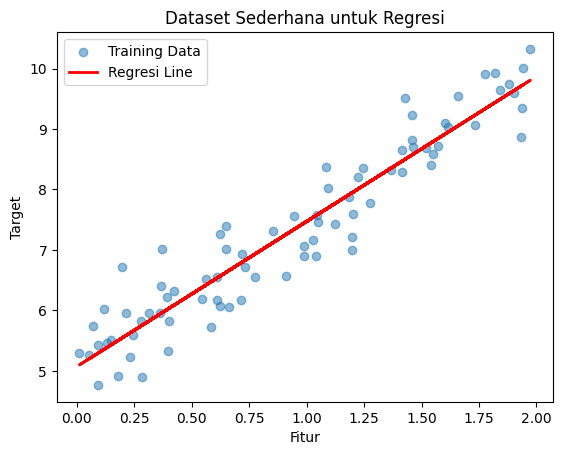

R^2 Score: 0.9287298556395622
RMSE: 0.40425843025130664
MAE: 0.29567128895948885
MSE: 0.16342487842925058
MAPE: 3.816766366685034


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Buat dataset regresi sederhana
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # Fitur
y = 5 + 2.5 * X + np.random.randn(100, 1) * 0.5  # Target dengan sedikit noise

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Plot dataset dengan garis regresi
plt.scatter(X_train, y_train, label='Training Data', alpha=0.5)
plt.plot(X_train, y_pred_train, color='red', linewidth=2, label='Regresi Line')
plt.xlabel('Fitur')
plt.ylabel('Target')
plt.title('Dataset Sederhana untuk Regresi')
plt.legend()
plt.show()

# Evaluasi regresi
r2 = r2_score(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

print("R^2 Score:", r2)
print("RMSE:", rmse)
print("MAE:", mae)
print("MSE:", mse)
print("MAPE:", mape)


Akurasi: 1.0
Presisi: 1.0
Recall: 1.0
F1 Score: 1.0


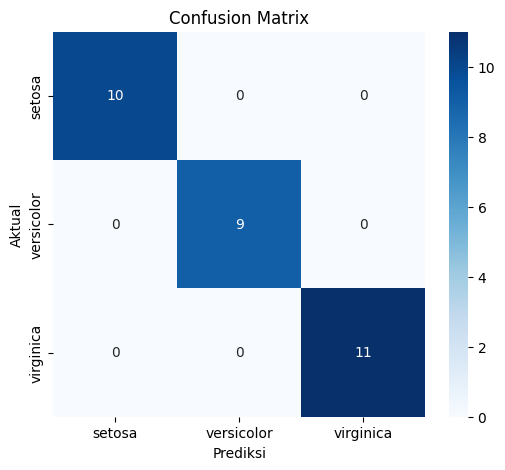

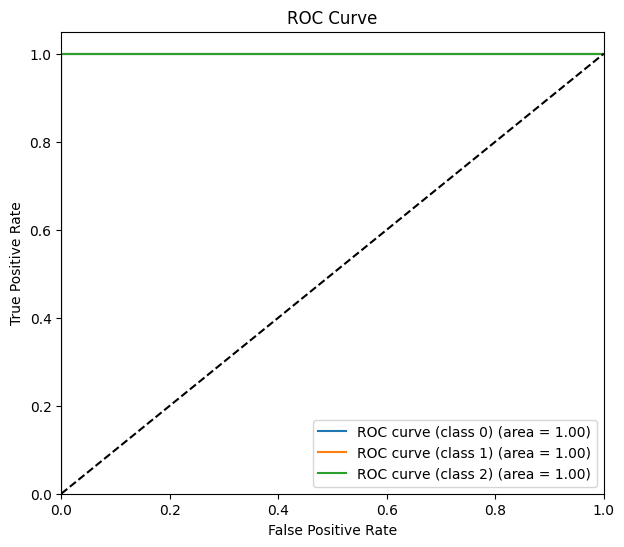

In [ ]:
# KLASIFIKASI
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import seaborn as sns
from sklearn.preprocessing import label_binarize

# Load dataset (Iris dataset)
iris = load_iris()
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
X = df.drop('target', axis=1)
y = df['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model klasifikasi
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Prediksi
y_pred = clf.predict(X_test)

# Evaluasi klasifikasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Akurasi:", accuracy)
print("Presisi:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC Curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = clf.predict_proba(X_test)
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(7, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve (class {i}) (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()